# PROGRAM STATEMENT

Write a program to implement k-Nearest Neighbour algorithm to classify the iris.csv data set.

In [ ]:
# importing pandas library for CSV file I/O
import pandas as pd
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/advertising.csv")

In [ ]:
print("First 5 rows of the dataset: ")
print(df.head())

First 5 rows of the dataset: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print("Shape of the Data Frame: ", df.shape)

Shape of the Data Frame:  (150, 6)


In [ ]:
print("The summary of dataset: ")
print(df.info())

The summary of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print("Check for missing values: ")
print(df.isnull().sum())

Check for missing values: 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# There are no missing values in variables

In [ ]:
# Declarng the feature vector and target variable
X = df.iloc[:, 1:5]
y = df.iloc[:, 5]

In [ ]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
print('Shape of Training set of features: ', X_train.shape)
print('Shape of Testing set of features: ', X_test.shape)
print('Shape of Training set of target: ', y_train.shape)
print('Shape of Testing set of target: ', y_test.shape)

Shape of Training set of features:  (105, 4)
Shape of Testing set of features:  (45, 4)
Shape of Training set of target:  (105,)
Shape of Testing set of target:  (45,)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit() calculates the mean and standard deviation of X
scaler.fit(X)

StandardScaler()

In [ ]:
# transform() fits the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Intantiate classifier
classifier = KNeighborsClassifier(n_neighbors = 5)
# Fitting classifier to rtraining set
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# make predictions to the test set
y_pred = classifier.predict(X_test)

In [ ]:
# importing metrics to calculate accuracy score
from sklearn import metrics
print("The accuracy score is: ", metrics.accuracy_score(y_test, y_pred))

The accuracy score is:  0.9777777777777777


In [ ]:
# Classification Report
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  1]
 [ 0  0 10]]


In [1]:
import numpy as np

# Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors = i)
  # knn.fit(X_train, y_train)
  # pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))

NameError: ignored

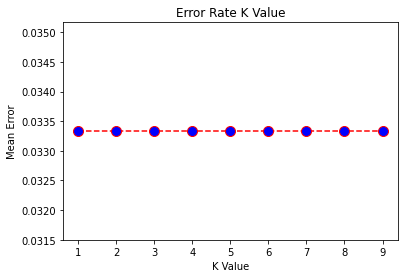

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10), error,
  color='red', linestyle='dashed',
  marker='o', markerfacecolor='blue',
  markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()